# Square Trade - IMF Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_frame = pd.read_excel('C:/Users/smithj/Downloads/Detailed_Revenue_Breakdown.xlsx', skiprows=7, engine='openpyxl')
raw_frame = raw_frame.rename(columns={'Unnamed: 0' : 'revenue_source'})

In [3]:
column_list = list(raw_frame.columns.tolist())
conditions_cat = []
conditions_sub_cat = []

In [4]:
category_types = ['Revenue',
                  'Other revenue',
                  'Taxes',
                  'Social contributions',
                  'Grants',
                  ]

sub_category_types = ['Taxes on income, profits, & capital gains',
                      'Taxes on goods & services',
                      'Grants from other gen govt',
                      'Excise taxes',
                      ]

In [5]:
raw_frame.tail(10)

,revenue_source,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 24
18,Grants from int orgs,0.006,0.007,0.005,0.000,0.008,0.013,0.010,0.012,0.013,...,0.045,0.121,0.105,0.123,0.047,0.157,0.272,0.060,0.029,NaN
19,Grants from other gen govt,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.242,1.320,...,0.136,13.480,0.251,0.305,1.145,0.202,0.196,0.223,0.405,NaN
20,Grants from other gen govt: current,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
21,Grants from other gen govt: capital,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.242,1.320,...,0.136,13.480,0.251,0.305,1.145,0.202,0.196,0.223,0.405,NaN
22,Other revenue,12.096,12.119,11.284,12.360,14.003,13.032,13.549,17.501,27.287,...,23.980,27.866,46.404,39.815,39.687,40.286,44.956,45.929,44.677,NaN
23,Property income,9.366,9.647,8.819,9.821,10.496,9.196,9.373,8.557,8.321,...,9.326,13.142,28.010,17.808,18.163,19.025,21.029,19.977,19.932,NaN
24,Sales of goods & services,1.935,1.794,2.003,2.046,2.595,2.858,2.940,7.578,10.168,...,13.050,11.833,13.314,14.478,15.428,16.480,18.153,19.920,18.780,NaN
25,"Fines, penalties & forfeits",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
26,Other transfers,0.439,0.438,0.368,0.377,0.785,0.830,0.968,1.005,8.408,...,1.165,2.464,4.664,7.106,5.659,4.347,5.330,5.575,5.503,NaN
27,"NI & SGS: premiums, fees & claims",0.356,0.240,0.094,0.116,0.127,0.148,0.268,0.361,0.390,...,0.439,0.427,0.416,0.423,0.437,0.434,0.444,0.457,0.462,NaN


In [6]:
melted_frame = pd.melt(raw_frame, id_vars=['revenue_source'], value_vars=column_list[1:], var_name='year')
melted_frame = melted_frame[melted_frame['year'] != 'Unnamed: 24']
melted_frame.head(10)

,revenue_source,year,value
0,Revenue,1997,297.481
1,Taxes,1997,225.764
2,"Taxes on income, profits, & capital gains",1997,107.734
3,"Taxes on income, profits, & capital gains: ind...",1997,75.598
4,"Taxes on income, profits, & capital gains: cor...",1997,32.136
5,"Taxes on income, profits, & capital gains: other",1997,0.000
6,Taxes on payroll & workforce,1997,0.000
7,Taxes on property,1997,15.732
8,Taxes on goods & services,1997,102.298
9,General taxes on goods & services,1997,57.950


In [7]:
for category in category_types[2:]:
    conditions_cat.append(melted_frame['revenue_source'].str.contains(category.split()[0], case=False, regex=False))

for sub_category in sub_category_types:
    conditions_sub_cat.append(melted_frame['revenue_source'].str.contains(sub_category, case=False, regex=False))

In [8]:
outcomes_cat = ['Taxes',
                'Social Contributions',
                'Grants',
                ]

outcomes_subcat = ['Taxes on income, profits, & capital gains',
                   'Taxes on goods & services',
                   'Grants from other gen govt',
                   'Taxes on goods & services',
                   ]

In [9]:
melted_frame['category'] = np.select(conditions_cat, outcomes_cat, default='Other')
melted_frame['sub_category'] = np.select(conditions_sub_cat, outcomes_subcat, default=np.nan)
melted_frame = melted_frame[~melted_frame['revenue_source'].isin(category_types)]
melted_frame = melted_frame[~melted_frame['revenue_source'].isin(sub_category_types[:3])]

melted_frame.tail(10)

,revenue_source,year,value,category,sub_category
631,Other social contributions,2019,34.400,Social Contributions,nan
633,Grants from foreign govts,2019,0.041,Grants,nan
634,Grants from int orgs,2019,0.029,Grants,nan
636,Grants from other gen govt: current,2019,0.000,Grants,Grants from other gen govt
637,Grants from other gen govt: capital,2019,0.405,Grants,Grants from other gen govt
639,Property income,2019,19.932,Other,nan
640,Sales of goods & services,2019,18.780,Other,nan
641,"Fines, penalties & forfeits",2019,0.000,Other,nan
642,Other transfers,2019,5.503,Other,nan
643,"NI & SGS: premiums, fees & claims",2019,0.462,Other,nan


In [10]:
category_group = melted_frame.groupby(['year', 'category']).sum()
category_group

value
year category                     
1997 Grants                  0.006
     Other                  12.096
     Social Contributions   59.615
     Taxes                 214.810
1998 Grants                  0.007
...                            ...
2018 Taxes                 525.042
2019 Grants                  0.475
     Other                  44.677
     Social Contributions  177.392
     Taxes                 537.051

[92 rows x 1 columns]

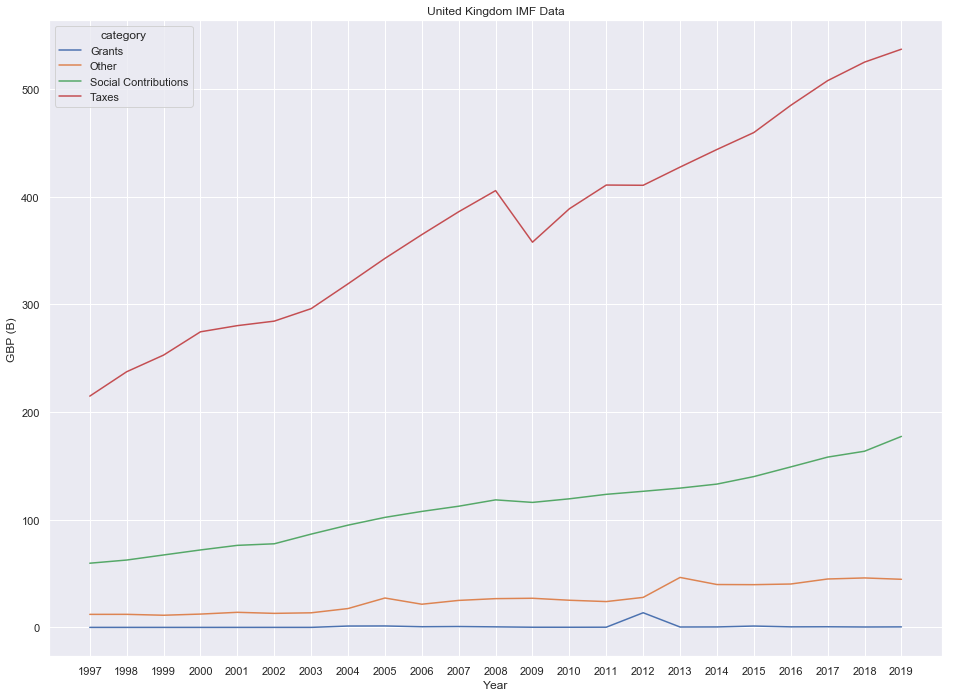

In [27]:
sns.set(rc={'figure.figsize':(16,11.7)})
sns.set_style('darkgrid')
g = sns.lineplot(x='year', y='value', hue='category', data=category_group)
g.set(xlabel='Year', ylabel='GBP (B)', title='United Kingdom IMF Data')
g

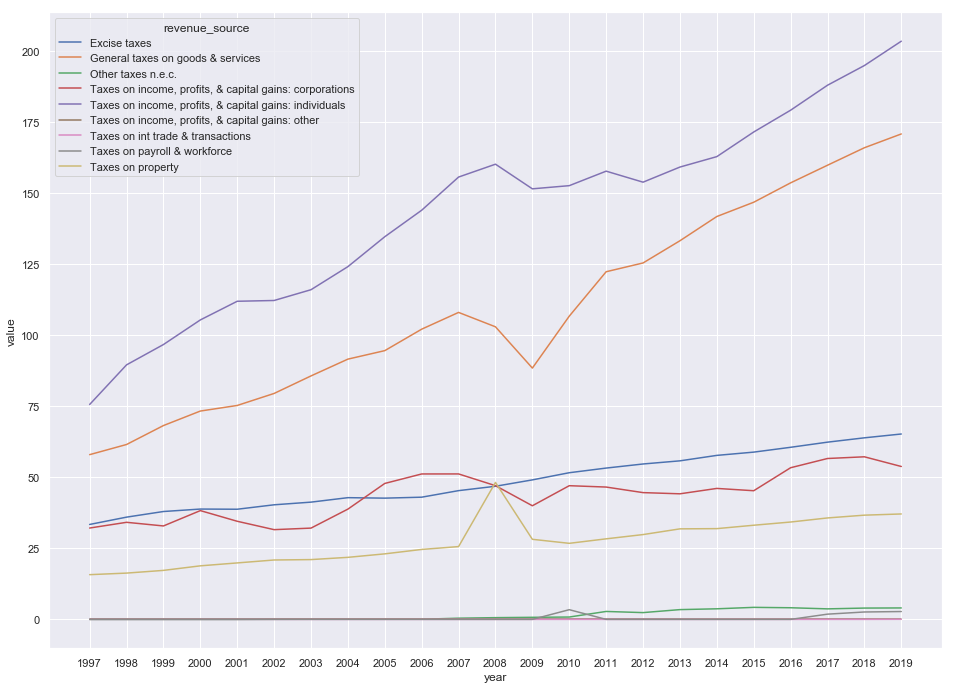

In [18]:
sub_category_group = melted_frame[melted_frame['category'] == 'Taxes'].groupby(['year', 'revenue_source']).sum()
sns.lineplot(x='year', y='value', hue='revenue_source', data=sub_category_group)

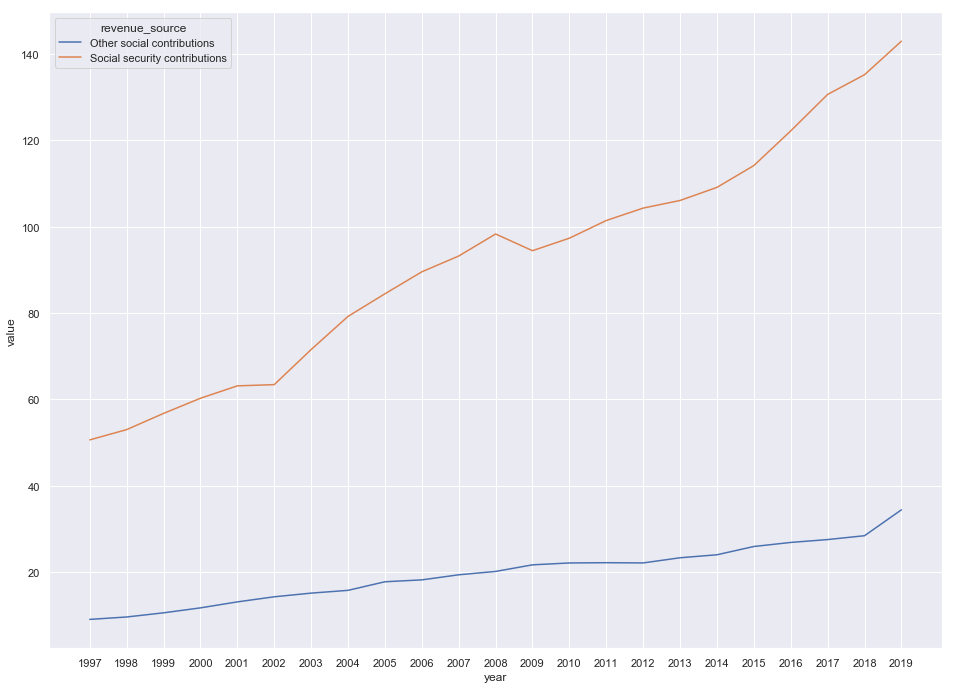

In [28]:
sub_category_group = melted_frame[melted_frame['category'] == 'Social Contributions'].groupby(['year', 'revenue_source']).sum()
sns.lineplot(x='year', y='value', hue='revenue_source', data=sub_category_group)

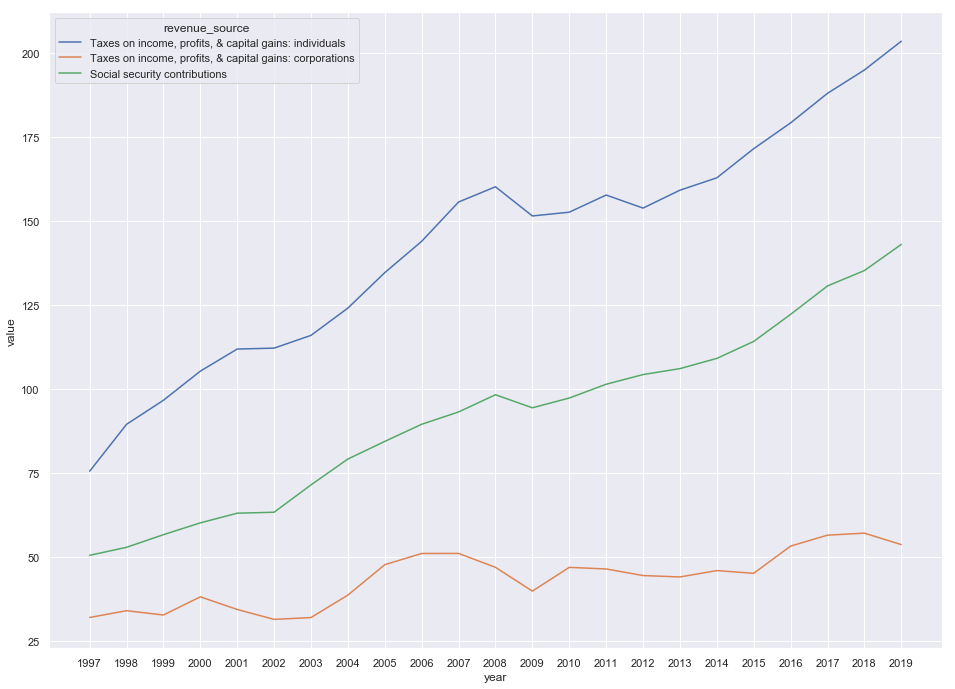

In [53]:
larger_growers = ['Taxes on income, profits, & capital gains: individuals', 'Social security contributions', 'Taxes on income, profits, & capital gains: corporations']

sub_category_group = sub_category_group = melted_frame[melted_frame['revenue_source'].isin(larger_growers)]
sns.lineplot(x='year', y='value', hue='revenue_source', data=sub_category_group)

AttributeError: 'FacetGrid' object has no attribute 'set_major_formatter'

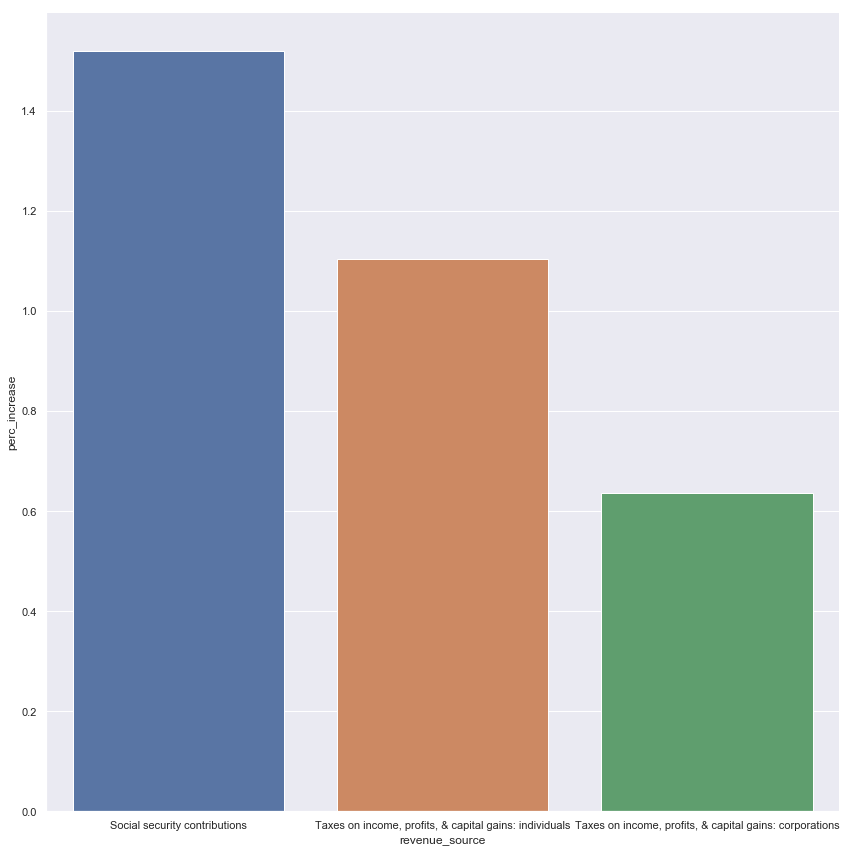

In [88]:
bar_frame = sub_category_group[sub_category_group['year'].isin(['1999', '2019'])]
bar_frame = bar_frame.groupby(['revenue_source'])['value'].agg(last='max', first='min')
bar_frame['perc_increase'] = (bar_frame['last'] - bar_frame['first']) / bar_frame['first']
bar_frame = bar_frame.reset_index()
bar_frame.sort_values(by=['perc_increase'], inplace=True, ascending=False)



# sns.set(rc={'figure.figsize':(16,11.7)})
g = sns.catplot(kind='bar', x='revenue_source', y='perc_increase', data=bar_frame, height=12)
g.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
g